In [1]:
using Distributions
using PyPlot
using HCubature
using BenchmarkTools

In [162]:
μ = [0,2]
σ = [1,3]

dist_1_x = Normal(μ[1], σ[1])
dist_1_y = Normal(μ[2], σ[2])
    
x_edges = range(-5, length = 20, stop=5) 
y_edges = range(-5, length = 25, stop=6) 
    
z1 = diff(cdf.(dist_1_y, y_edges)) * diff(cdf.(dist_1_x, x_edges))';

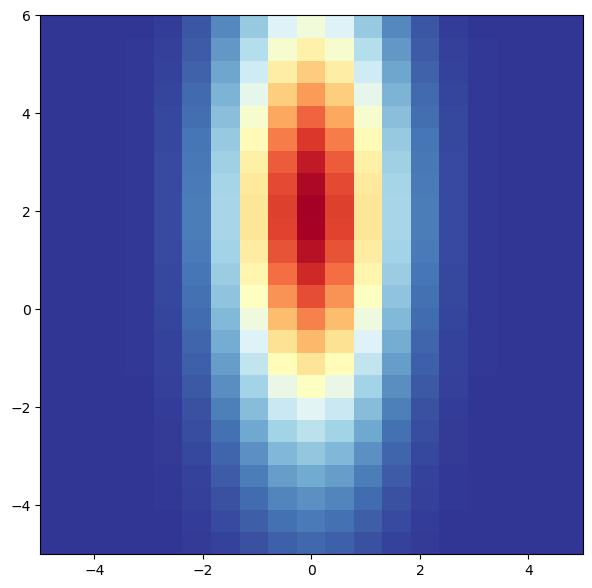

PyObject <matplotlib.collections.QuadMesh object at 0x7f00786dadf0>

In [163]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

ax.pcolormesh(x_edges, y_edges, z1, cmap="RdYlBu_r")

In [164]:
sum(z1)

0.8989729362611808

In [165]:
mvdist = MvNormal(μ, [1^2 0; 0 3^2])

α = 0*pi/4 
R = [cos(α) sin(α) ; -sin(α) cos(α)]

int_func(x) = pdf(mvdist, R*x)

data = zeros(Float64, size(z1))

for pix_ind in CartesianIndices(data)
    
    x_edge = pix_ind.I[2]
    y_edge = pix_ind.I[1]
    
    data[pix_ind] = hcubature(int_func, [x_edges[x_edge], y_edges[y_edge]], [x_edges[x_edge+1], y_edges[y_edge+1]], rtol=0.1, maxevals=3000)[1]
end

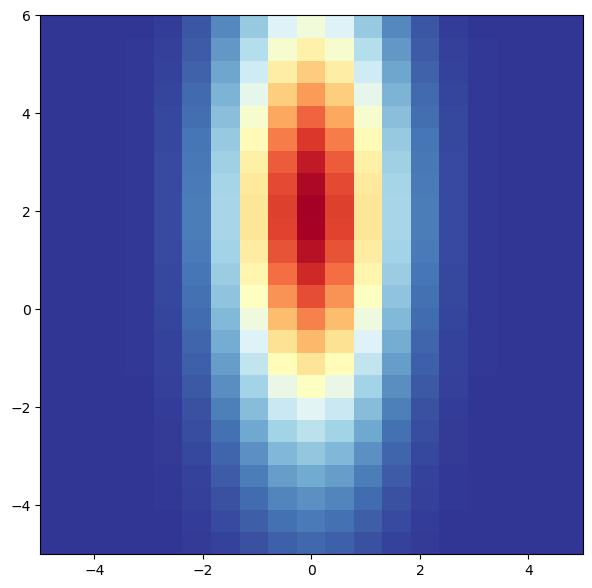

PyObject <matplotlib.collections.QuadMesh object at 0x7f0078273d60>

In [166]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

ax.pcolormesh(x_edges, y_edges, data, cmap="RdYlBu_r")

In [134]:
sum(data)

0.8989729362611317

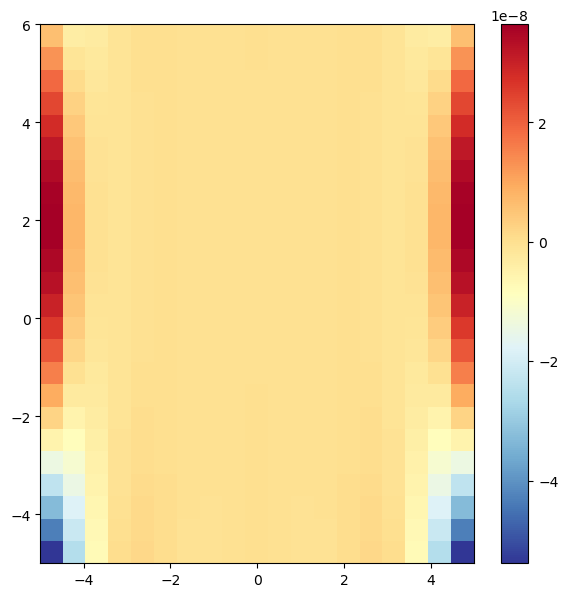

PyObject <matplotlib.colorbar.Colorbar object at 0x7f0078467490>

In [135]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

im = ax.pcolormesh(x_edges, y_edges, (data .- z1) ./ z1, cmap="RdYlBu_r")

fig.colorbar(im, orientation="vertical")

In [140]:
data = zeros(Float64, size(z1))

for pix_ind in CartesianIndices(data)
    
    x_edge = pix_ind.I[2]
    y_edge = pix_ind.I[1]
    
    x1 = [x_edges[x_edge], y_edges[y_edge]]
    x2 = [x_edges[x_edge], y_edges[y_edge+1]]
    x3 = [x_edges[x_edge+1], y_edges[y_edge]]
    x4 = [x_edges[x_edge+1], y_edges[y_edge+1]]
    
    vals = int_func.([x1, x2, x3,x4])
    
    data[pix_ind] = diff(x_edges)[1]*diff(y_edges)[1]*mean(vals)
end

In [141]:
sum(data)

0.8984282064104409

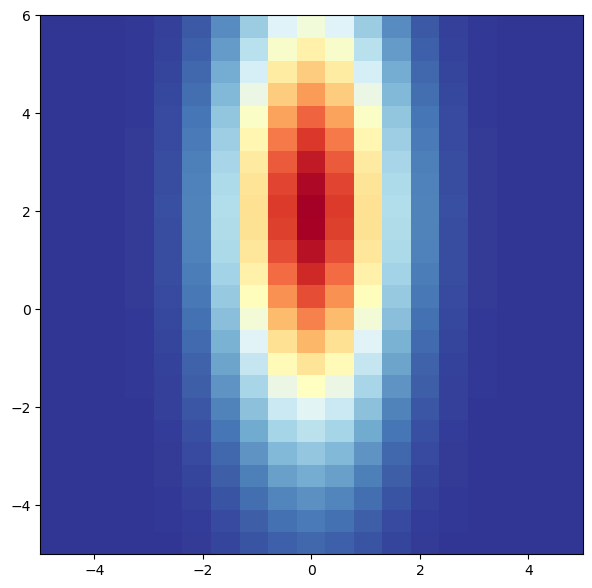

PyObject <matplotlib.collections.QuadMesh object at 0x7f00783af670>

In [142]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

ax.pcolormesh(x_edges, y_edges, data, cmap="RdYlBu_r")

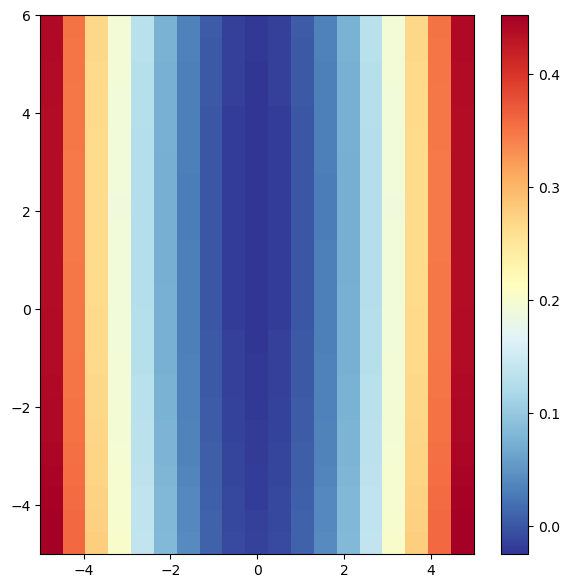

PyObject <matplotlib.colorbar.Colorbar object at 0x7f00782fe0d0>

In [143]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

im = ax.pcolormesh(x_edges, y_edges, (data .- z1) ./ z1, cmap="RdYlBu_r")

fig.colorbar(im, orientation="vertical")

In [ ]:
α = pi/2
R = [cos(α) sin(α) ; -sin(α) cos(α)]

function get_cov(σ_1, σ_2, α)
    a = cos(α)^2 /2/σ_1^2 + sin(α)^2 /2/σ_2^2
    b = - sin(2*α)/4/σ_1^2 + sin(2*α)/4/σ_2^2
    c = sin(α)^2 /2/σ_1^2 + cos(α)^2 /2/σ_2^2
    
    return [a b ; b c] .* σ_1*σ_2
end

In [ ]:
diff(x_edges)[1]

In [ ]:
cmat = get_cov(σ[1], σ[2], α)
rotdist = MvNormal(R*μ, [3 0;0 1])  #MvNormal(μ, cmat)

int_func(x) = pdf(rotdist, R*x)

data = zeros(Float64, size(z1))

for pix_ind in CartesianIndices(data)
    
    x_edge = pix_ind.I[1]
    y_edge = pix_ind.I[2]
    
    data[pix_ind] = hcubature(int_func, [x_edges[x_edge] - diff(x_edges)[1], y_edges[y_edge] - diff(y_edges)[1]], [x_edges[x_edge], y_edges[y_edge]])[1]
end

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

ax.pcolormesh(x_edges, y_edges, data, cmap="RdYlBu_r")